In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, roc_auc_score
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_decision_regions

df = pd.read_csv("data.csv")

In [3]:
label_encoder = LabelEncoder()
df['rank_category'] = label_encoder.fit_transform(df['rank_category'])

X = df[['Hours_streamed', 'Peak_viewers', 'Peak_channels', 'Streamers', 'Avg_viewers', 'Avg_channels']]
y = df['rank_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

feature_names = X_train.columns 

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Selected Features: Index(['Hours_streamed', 'Peak_channels', 'Avg_viewers'], dtype='object')


/var/folders/r2/19qqvq2s2r98_0dqh9mb5vsm0000gn/T/ipykernel_22267/1551147252.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'RFE_Ranking', y = 'Feature', data = rfe_ranking_df, palette = 'viridis', orient = 'h')


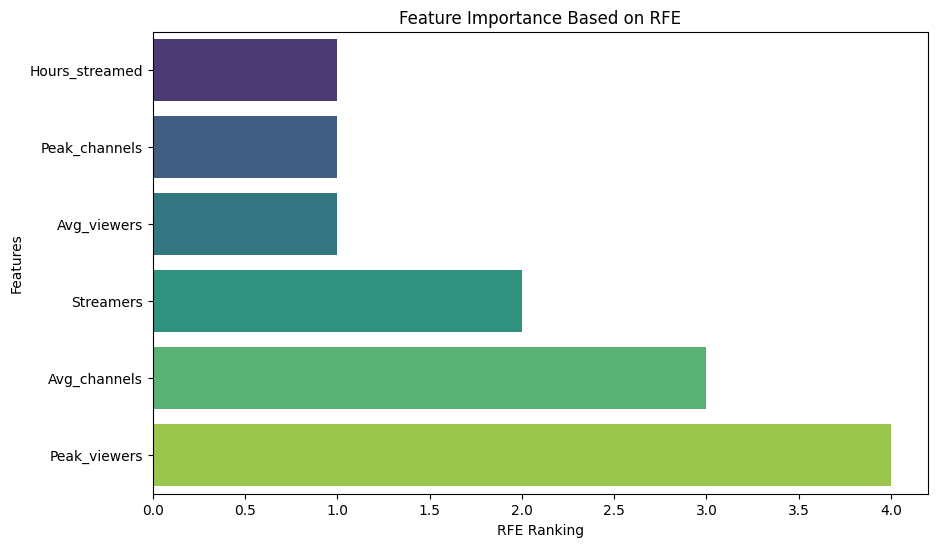

In [4]:
svm_model = SVC(kernel = 'linear')

rfe = RFE(svm_model, n_features_to_select = 3)
rfe.fit(X_train, y_train)

selected_features = feature_names[rfe.support_]
print('Selected Features:', selected_features)

rfe_ranking_df = pd.DataFrame({'Feature': feature_names, 'RFE_Ranking': rfe.ranking_})
rfe_ranking_df = rfe_ranking_df.sort_values(by = 'RFE_Ranking')

plt.figure(figsize = (10, 6))
sns.barplot(x = 'RFE_Ranking', y = 'Feature', data = rfe_ranking_df, palette = 'viridis', orient = 'h')

plt.xlabel('RFE Ranking')
plt.ylabel('Features')
plt.title('Feature Importance Based on RFE')
plt.show()

Model Accuracy: 0.7726
              precision    recall  f1-score   support

      Top 10       0.92      0.75      0.83       221
     Top 100       0.67      0.44      0.53      1036
     Top 200       0.78      0.98      0.87      2088
      Top 50       0.82      0.67      0.74       855

    accuracy                           0.77      4200
   macro avg       0.80      0.71      0.74      4200
weighted avg       0.77      0.77      0.76      4200



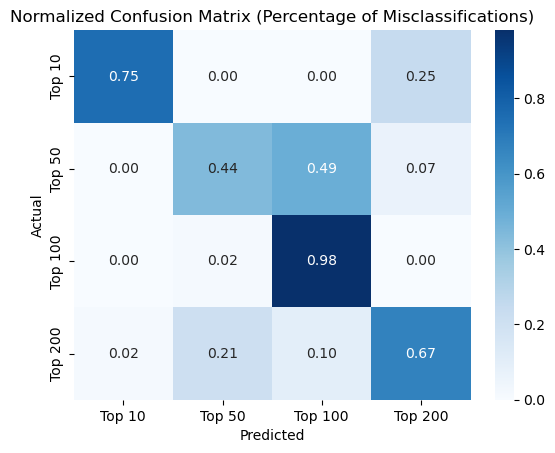

In [4]:
# X = df[['Hours_streamed', 'Peak_channels', 'Avg_viewers']] - Accuracy 0.7717
# X = df[['Hours_streamed', 'Peak_channels']] - Accuracy 0.6090
# X = df[['Avg_viewers']] - Accuracy 0.7714
# X = df[['Hours_streamed']] - Accuracy 0.6093
# X = df[['Peak_channels']] - Accuracy 0.5910
X = df[['Peak_channels', 'Avg_viewers']]
y = df['rank_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm_model = SVC(kernel = 'rbf', C = 1.0, gamma = 'scale')
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

y_pred_orig = label_encoder.inverse_transform(y_pred)
y_test_orig = label_encoder.inverse_transform(y_test)

accuracy = accuracy_score(y_test_orig, y_pred_orig)
print(f'Model Accuracy: {accuracy:.4f}')
print(classification_report(y_test_orig, y_pred_orig))

labels = ["Top 10", "Top 50", "Top 100", "Top 200"]
conf_matrix = confusion_matrix(y_test_orig, y_pred_orig)
conf_matrix_normalized = conf_matrix.astype("float") / conf_matrix.sum(axis=1, keepdims=True)
sns.heatmap(conf_matrix_normalized, annot=True, cmap="Blues", fmt=".2f", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Normalized Confusion Matrix (Percentage of Misclassifications)")
plt.show()


In [6]:
param_grid = {
    'C': [1, 5, 10, 15],
    'gamma': ['scale', 0.01, 0.1, 'auto'],
    'kernel': ['rbf']
}
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
grid_search = GridSearchCV(SVC(), param_grid, cv = cv, scoring = 'accuracy', n_jobs = -1)
grid_search.fit(X_train, y_train)

print('Best Parameters:', grid_search.best_params_)

best_svm = grid_search.best_estimator_
y_pred_best = best_svm.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Optimized Accuracy: {accuracy_best:.4f}')

Best Parameters: {'C': 15, 'gamma': 'scale', 'kernel': 'rbf'}
Optimized Accuracy: 0.7729


Model Accuracy: 0.7729
              precision    recall  f1-score   support

      Top 10       0.91      0.76      0.82       221
     Top 100       0.65      0.47      0.55      1036
     Top 200       0.78      0.98      0.87      2088
      Top 50       0.85      0.65      0.73       855

    accuracy                           0.77      4200
   macro avg       0.80      0.71      0.74      4200
weighted avg       0.77      0.77      0.76      4200



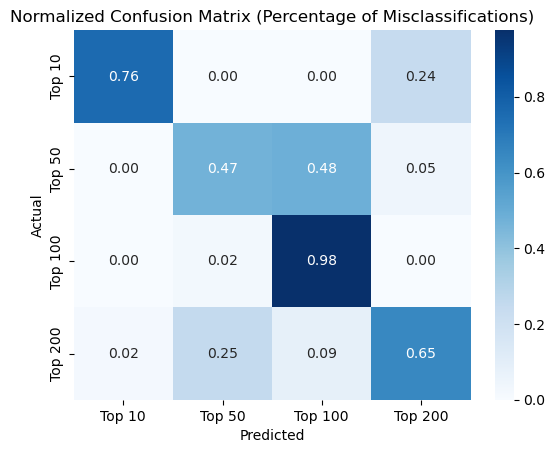

In [5]:
X = df[['Peak_channels', 'Avg_viewers']]
y = df['rank_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm_model = SVC(kernel = 'rbf', C = 15, gamma = 'scale')
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

y_pred_orig = label_encoder.inverse_transform(y_pred)
y_test_orig = label_encoder.inverse_transform(y_test)

accuracy = accuracy_score(y_test_orig, y_pred_orig)
print(f'Model Accuracy: {accuracy:.4f}')
print(classification_report(y_test_orig, y_pred_orig))

labels = ["Top 10", "Top 50", "Top 100", "Top 200"]
conf_matrix = confusion_matrix(y_test_orig, y_pred_orig)
conf_matrix_normalized = conf_matrix.astype("float") / conf_matrix.sum(axis=1, keepdims=True)
sns.heatmap(conf_matrix_normalized, annot=True, cmap="Blues", fmt=".2f", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Normalized Confusion Matrix (Percentage of Misclassifications)")
plt.show()

Multi-Class AUC Score: 0.9058


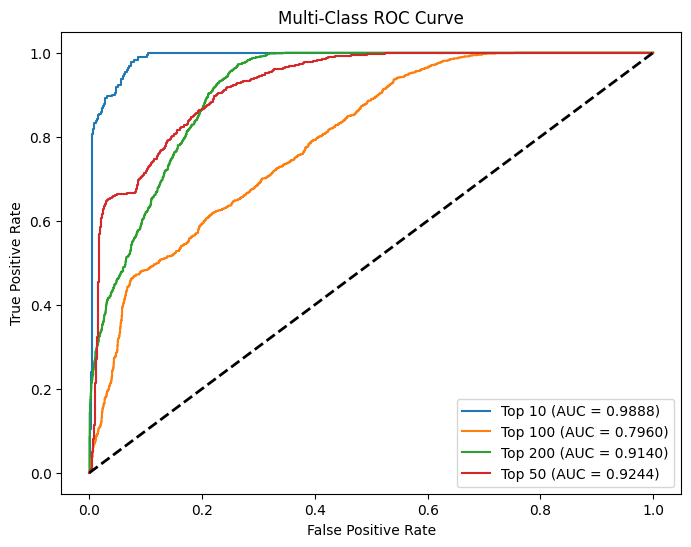

In [ ]:
categories = label_encoder.classes_
y_test_bin = label_binarize(y_test, classes = np.arange(len(categories)))
y_pred_prob = svm_model.decision_function(X_test)

auc_score = roc_auc_score(y_test_bin, y_pred_prob, multi_class='ovr')
print(f'Multi-Class AUC Score: {auc_score:.4f}')

plt.figure(figsize = (8, 6))

for i, category in enumerate(categories):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{category} (AUC = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], 'k--', lw = 2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc = 'best')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


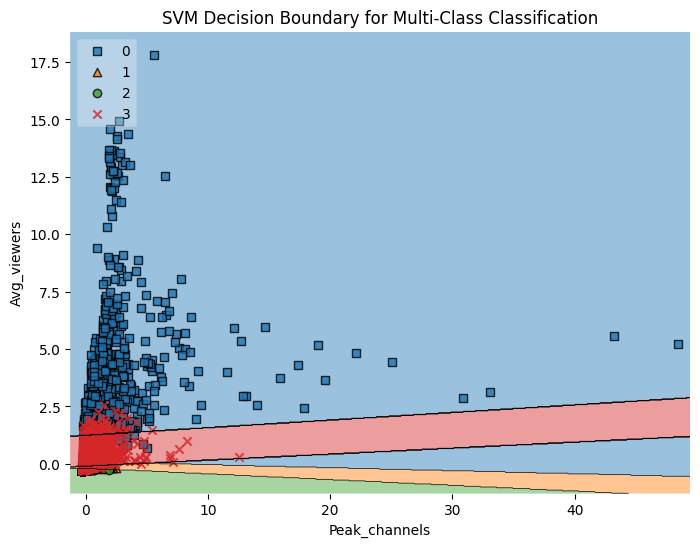

In [9]:
y_encoded = LabelEncoder().fit_transform(y_train)

svm_clf = SVC(kernel = 'linear', decision_function_shape = 'ovr', random_state = 42)
svm_clf.fit(X_train[:, :2], y_encoded)

plt.figure(figsize = (8, 6))
plot_decision_regions(X_train[:, :2], y_encoded, clf = svm_clf, legend = 2)
plt.xlabel('Peak_channels')
plt.ylabel('Avg_viewers')
plt.title('SVM Decision Boundary for Multi-Class Classification')
plt.show()

In [10]:
valid_categories = ['Top 10', 'Top 50', 'Top 100', 'Top 200']

while True:
    user_input = input(f'Enter a rank category ({', '.join(valid_categories)}): ').strip()
    if user_input in valid_categories:
        break
    print('Invalid input. Please enter one of the specified categories.')

filtered_df = predictions_df[predictions_df['Predicted Rank Category'] == user_input]

if not filtered_df.empty:
    print(filtered_df.head(30))
else:
    print(f'No games found for the selected rank category: {user_input}')

Invalid input. Please enter one of the specified categories.
Invalid input. Please enter one of the specified categories.
                                 Game Actual Rank Category  \
22                             Dota 2               Top 10   
56                           Fortnite               Top 10   
74                       Apex Legends               Top 10   
101                     Just Chatting               Top 10   
102                 League of Legends               Top 10   
119                 Teamfight Tactics               Top 10   
127                          Among Us               Top 10   
139                 League of Legends               Top 10   
170                Grand Theft Auto V               Top 10   
177                     Just Chatting               Top 10   
202           PokÃ©mon Scarlet/Violet               Top 50   
203                            Dota 2               Top 10   
213                          Fortnite               Top 10   
249       